<a href="https://colab.research.google.com/github/FerrazThales/Churn_prediction/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?


# *Você vai aprender aqui*

* O que é **Churn** e como isso pode ser **importante** para o seu negócio.
* Quais os **tipos de dados** são os melhores para serem utilizados neste problema.
* Como algoritmos de **classificação supervisionados** podem ajudar neste tema.
* x
* x

# Churn Prediction

Clientes são considerados um dos grandes **ativos** de um negócio. Em um cenário **competitivo**, em que o cliente possui inúmeras opções de escolhas, é necessário tentar fornecer a melhor experiência possível para os seus consumidores.

*Churn rate*, ou simplesmente *churn*, representa a **taxa de evasão** da sua base de clientes. Em serviços como Spotify ou Netflix ela representaria a **taxa de cancelamento** de assinaturas em um determinado período.

<p align=center>
<img src="https://cdn.pixabay.com/photo/2017/10/03/19/17/bad-review-2813741_960_720.png" width="40%"></p>

Esta taxa de cancelamento é de extrema importância para o **gerenciamento** e sua análise ao longo do tempo pode mostrar que existe algum **problema** que deve ser **atacado**. Já que se considera que os custos  para conquistar um **novo** cliente pode ser até 15x maior do que o para reter um cliente **atual**.

Uma análise preditiva de *Churn* ajudará a identificar **potenciais cancelamentos** com um tempo de antecedência. Desta forma, possibilita a empresa a promover ações direcionadas para tentar **reter** os clientes que estão insatisfeitos. Ou até mesmo, avaliar se compensa manter estes clientes considerando as **receitas** que eles proporcionam.

## Obtenção dos Dados

Os dados utilizados neste projeto foram **originalmente** disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema **típico** de uma companhia de **telecomunicações**. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

É importante ressalar que estes tipos de dados são extremamente utilizados para elaborar uma **estratégia de negócios**, portanto não são fáceis de se obter informações **atualizadas**.


Para um melhor entendimento de nosso banco de dados foi elaborado um **pequeno dicionário** das variáveis:

* *customerID*: identificação única do usuário na empresa.
* *gender*: gênero do usuário.
* *SeniorCitizen*: Se o cliente é idoso ou não.
* *Partner*: Se o cliente possui acompanhante ou não.
* *Dependents*: Se o cliente possui dependentes.
* *tenure*:
* *PhoneService*: Se o cliente optou por serviços telefônicos.
* *MultipleLines*:
* *InternetService*: Se o cliente optou por serviços de internet.
* *OnlineSecurity*:
* *OnlineBackup*:
* *DeviceProtection*:
* *TechSupport*:
* *StreamingTV*: Se o cliente optou por serviços de streaming na TV.
* *StreamingMovies*: Se o cliente optou por serviços de streaming para Filmes.
* *Contract*: Tipo de contrato do cliente (mensal, anual ou de dois anos).
* *PaperlessBilling*:
* *PaymentMethod*: Forma de pagamento (cheque eletrônico - [sim, existiu](https://www1.folha.uol.com.br/fsp/1996/1/31/dinheiro/12.html); um cheque por e-mail - [sim,existiu](https://forum.wordreference.com/threads/a-mailed-check-must-clear-the-bank.866139/) ; transferência bancária e cartão de crédito.
* *MonthlyCharges*:
* *TotalCharges*:
* *Churn*: Se o cliente abandonou a empresa.

In [49]:
# importar os módulos necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#módulos do sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

In [50]:
# importar os dados
endereco_dos_dados = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(endereco_dos_dados)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória dos Dados

In [51]:
#Avaliando o tamanho do dataset
print('Este dataset contém:')
print('{:,} entradas'.format(df.shape[0]).replace(',','.'))
print('{} variáveis'.format(df.shape[1]))

Este dataset contém:
7.043 entradas
21 variáveis


In [52]:
#Tipo de variáveis de nossa base de dados
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Existem muitas variáveis do tipo *object* que precisam ser **convertidas** por variáveis **númericas** para melhorar a **perfomance** de nossos algoritmos. Falar do churn e do TotalCharges

In [53]:
#Avaliando a quantidade de valores ausentes
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de valores ausentes'])

,Quantidade de valores ausentes
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Aparentemente não existem valores vazios, mas vamos observar melhor.

In [54]:
df[['customerID','gender','tenure','MonthlyCharges','TotalCharges','Churn']][df['customerID'] == '2923-ARZLG']

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,19.7,,No


Falar da coluna  e do tenure

In [55]:
#mudando o TotalCharges para float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [56]:
#Avaliando a quantidade de valores ausentes
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de valores ausentes'])

,Quantidade de valores ausentes
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


aparece 11 valores vazios nas variáveis mudadas

In [62]:
df[['customerID','gender','tenure','MonthlyCharges','TotalCharges','Churn']][df['customerID'] == '2923-ARZLG']

,customerID,gender,tenure,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,19.7,NaN,0


falar da total charges

In [63]:
#tratamento dos valores vazios
df.dropna(inplace=True)

clientes que acabaram de entrar

In [59]:
#mudando o Churn para variável númerica
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

In [60]:
#estatistica descritiva de nossos dados
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.16,32.37,64.76,2283.30,0.27
std,0.37,24.56,30.09,2266.77,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.50,401.45,0.00
50%,0.00,29.00,70.35,1397.48,0.00
75%,0.00,55.00,89.85,3794.74,1.00
max,1.00,72.00,118.75,8684.80,1.00


Verificamos que as variávies **ternure** e **MonthlyCharges** possuem desviões padrões muito **acentuados** em relação a média.

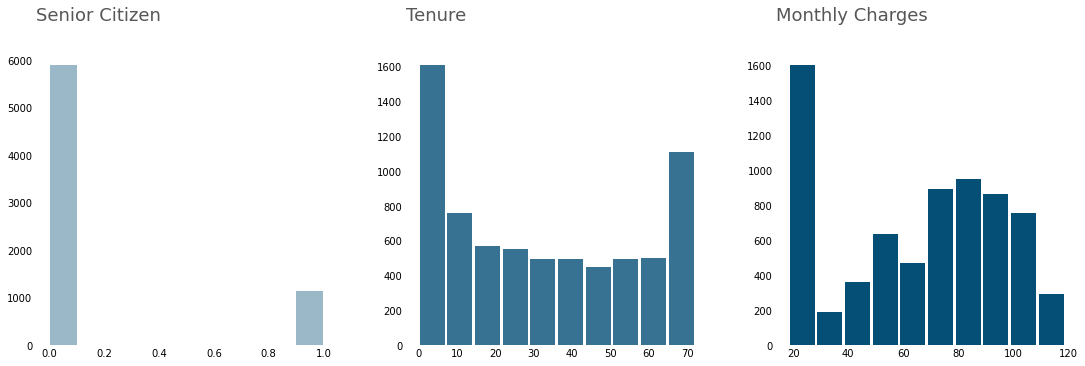

In [ ]:
#criando os outputs do matplotlib
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

#primeiro gráfico
df['SeniorCitizen'].hist(ax=ax[0],grid=False,color='#054F77',alpha=0.4).set_frame_on(False)
ax[0].set_title('Senior Citizen',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[0].tick_params(axis='both',which='both',length=0)

#segundo gráfico
df['tenure'].hist(ax=ax[1],grid=False,rwidth=0.9,color='#054F77',alpha=0.8).set_frame_on(False)
ax[1].set_title('Tenure',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[1].tick_params(axis='both',which='both',length=0)

#terceiro gráfico
df['MonthlyCharges'].hist(ax=ax[2],grid=False,rwidth=0.9,color='#054F77',alpha=1.0).set_frame_on(False)
ax[2].set_title('Monthly Charges',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'},color='#565656')
ax[2].tick_params(axis='both',which='both',length=0)

#exibir o gráfico
plt.tight_layout(pad=4.0);

conclusão

In [ ]:
#função para adicionar os labels
def addlabels(x,y):
  for i in range(len(x)):
    ax.annotate(y[i],xy=(i,y[i]),xytext=(i-0.1,y[i]+80),fontsize=15,fontfamily='Dejavu Sans',color='grey')  

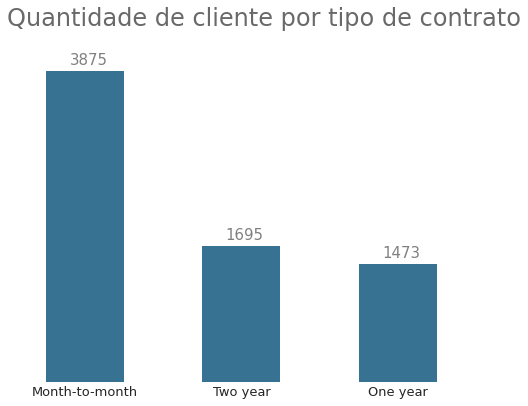

In [ ]:
#criando o figure e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,6))

#quantidade dos principais tipos de serviço
df['Contract'].value_counts().plot(kind='bar',rot=0,ax=ax,color='#054F77',alpha=0.8).set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Quantidade de cliente por tipo de contrato',loc='left',pad=30,fontdict={'fontsize':24,'Family':'Dejavu Sans'},color='dimgrey')
ax.tick_params(axis='x',length=0,labelsize=13,labelcolor='#242526')

#adicionando os rótulos ao gráfico
addlabels(df['Contract'].unique(),df['Contract'].value_counts())

#exibir o gráfico
plt.tight_layout(pad=2.0);

conclusão

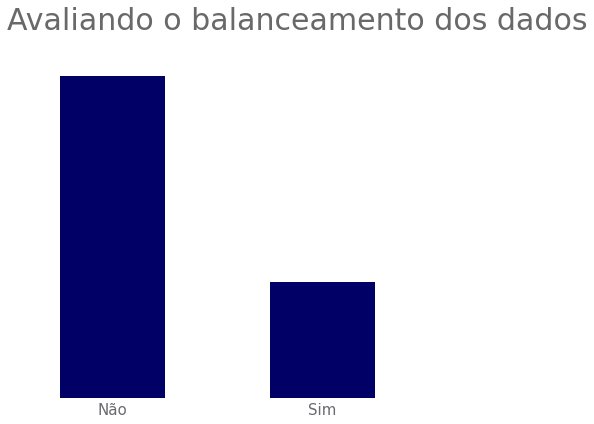

In [ ]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(8,6))

#Verificando o balanceamento dos dados
df.Churn.value_counts().plot.bar(ax=ax,color='#000066',rot=0).set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x',length=0,labelsize=13,labelcolor='#242526')
ax.set_xticklabels(['Não','Sim'],fontdict={'fontsize':15},color='#6a6a6f')
ax.set_title('Avaliando o balanceamento dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')

#plotando o gráfico
plt.tight_layout();

## Transformando as variáveis

In [ ]:
#definindo x e y
x=df.drop(['customerID','Churn'],axis=1)
y=df.Churn

#dividindo os dados em treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [ ]:
standard_numeric_features = ['tenure','MonthlyCharges','TotalCharges']
standard_numeric_transformer = StandardScaler()

categorical_features = ['gender','Partner','Dependents',
      'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
      'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

categorical_transformer = OneHotEncoder(sparse=False)


preprocessor = ColumnTransformer(transformers=[('num_stardard',standard_numeric_transformer,standard_numeric_features),
                                               ('cat',categorical_transformer,categorical_features)])


In [ ]:
clf = Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])

In [ ]:
clf.fit(x_train,y_train)

TypeError: ignored

## Conclusões

* isso
* aquilo
* aquilo lá

## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*